In [2]:
 # Init
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import drive

drive.mount('/content/gdrive')
PATH="/content/gdrive/MyDrive/Neo_garage"
!ls /content/gdrive/MyDrive/Neo_garage

Mounted at /content/gdrive
ASCII_200dpi.png  SPARC_ext.jpg        YELL_main_hi_ext.png
crop_ascii.png	  SPARC_final.png      YELL_main_hi.png
ICPC_cali.jpg	  SPARC.jpg	       YELL_main.png
ICPC_ext.jpg	  SPARC_res_11.png     YELL_main.txt
ICPC_final2.png   명도테이블.txt       YELL_result_extra_hi.odt
ICPC_final3.png   YELL_background.txt  YELL_result_hi2.odt
ICPC_final4.png   YELL_cali.jpg        YELL_result_hi.odt
ICPC.jpg	  YELL_final.png
roh.jpg		  YELL.jpg


In [3]:
# test code

# 이미지를 불러올 때는 PATH+"name.jpg" 이런식으로 부르면 된다.
# im=Image.open("")
# print(im.size)
# im.save('.jpg')
im=Image.open(PATH+"/YELL.jpg")
# im2=im.resize((1000,300))
# im3=im2.crop((0,0,800,200))
print(im.size)
print(type(im))
# im.show() # 이건 작동을 안하는데


(1200, 800)
<class 'PIL.JpegImagePlugin.JpegImageFile'>


In [4]:
im2=im.resize((300,200))
n2=np.array(im2)
print(n2.shape)

x=[]
y=[]
c=[]
for i in range(200):
  for j in range(300):
    x.append(j)
    y.append(200-i)
    c.append((n2[i][j][0]/256,n2[i][j][1]/256,n2[i][j][2]/256))
#plt.scatter(x,y,s=1,c=c)
#plt.show()

(200, 300, 3)


In [5]:
plt.figure(figsize=(12,8))
im3=im.resize((60,40))
n3=np.array(im3)
print(n3.shape)

x=[]
y=[]
c=[]
for i in range(40):
  for j in range(60):
    x.append(j)
    y.append(40-i)
    c.append((n3[i][j][0]/256,n3[i][j][1]/256,n3[i][j][2]/256))
'''
for i in range(40*60):
  plt.text(x[i]/60,y[i]/40-1/40,chr(65+ord('O')-ord('A')),family='sans',fontsize=13,c=c[i]) # family가 폰트, fontsize가 사이즈

plt.show()
'''

(40, 60, 3)


"\nfor i in range(40*60):\n  plt.text(x[i]/60,y[i]/40-1/40,chr(65+ord('O')-ord('A')),family='sans',fontsize=13,c=c[i]) # family가 폰트, fontsize가 사이즈\n\nplt.show()\n"

<Figure size 864x576 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 127 missing from current font.
  font.set_text(s, 0, flags=flags)


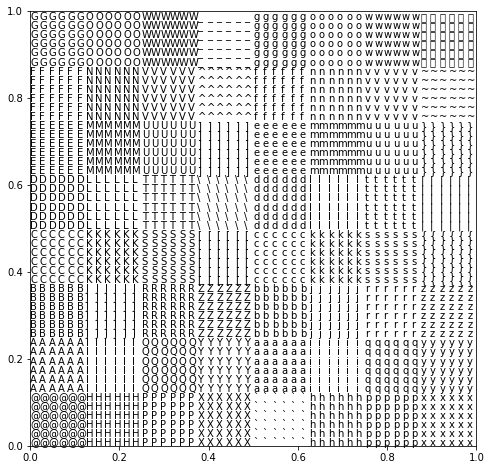

In [6]:
# 이미지 to ASCII변환 코드
plt.figure(figsize=(8,8))

#64~127 즉 8*8개 이용
mul=6
offset=64

for i in range(8*mul):
  for j in range(8*mul):
    plt.text(i/(8*mul),j/(8*mul),chr(offset+(int)(i/mul)*8+(int)(j/mul)),fontsize=10)

plt.savefig(PATH+'/ASCII_200dpi.png', dpi=200)

plt.show()

635 618
0.795 0.787 0.714 0.952 0.800 0.851 0.794 0.846 
0.861 0.762 0.831 0.925 0.883 0.862 0.878 0.931 
0.820 0.733 0.812 0.890 0.847 0.795 0.852 0.881 
0.777 0.880 0.876 0.913 0.817 0.917 0.894 0.903 
0.842 0.804 0.829 0.885 0.891 0.845 0.876 0.879 
0.769 0.885 0.789 0.823 0.815 0.911 0.913 0.869 
0.810 0.905 0.776 0.866 0.843 0.925 0.825 0.857 
0.695 0.797 0.822 0.829 0.971 0.844 0.816 0.866 


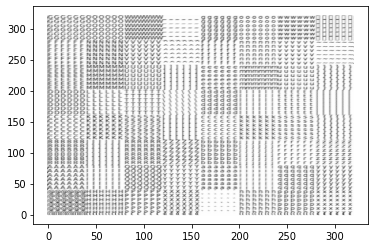

In [7]:
brightness=[]
im_ascii=Image.open(PATH+'/crop_ascii.png')
w=im_ascii.size[0]
h=im_ascii.size[1]
print(w,h)
sz=320
im_ascii=im_ascii.resize((sz,sz))
n_ascii=np.array(im_ascii)

x=[]
y=[]
c=[]
for i in range(sz):
  for j in range(sz):
    x.append(j)
    y.append(sz-i)
    c.append((n_ascii[i][j][0]/256,n_ascii[i][j][1]/256,n_ascii[i][j][2]/256))
plt.scatter(x,y,s=2,c=c)

mul=sz//8
for i in range(8):
  for j in range(8):
    result=0
    for i_ in range(mul):
      for j_ in range(mul):
        result+=(int(n_ascii[i*mul+i_][j*mul+j_][0])+int(n_ascii[i*mul+i_][j*mul+j_][1])+int(n_ascii[i*mul+i_][j*mul+j_][2]))/3
    result/=(sz/8)*(sz/8)
    result/=256
    brightness.append(result)
    print("{:.3f}".format(result),end=' ')
  print()

plt.show()

0.519 0.497 0.301 0.939 0.531 0.668 0.515 0.656 
0.695 0.430 0.614 0.867 0.755 0.696 0.740 0.883 
0.586 0.353 0.564 0.772 0.657 0.518 0.671 0.748 
0.470 0.747 0.734 0.834 0.578 0.845 0.784 0.809 
0.643 0.542 0.609 0.760 0.775 0.652 0.734 0.743 
0.450 0.759 0.503 0.593 0.572 0.828 0.836 0.718 
0.558 0.814 0.466 0.708 0.646 0.866 0.598 0.684 
0.249 0.524 0.591 0.610 0.990 0.649 0.573 0.708 

@ W M N B Q D O 
R w m G H g K A 
U b p d E P Z q 
S X V C a h k e 
o u y F n Y x z 
s T v { L } f J 
[ ] c t | I j \ 
r l i ^ ~ _ ` 


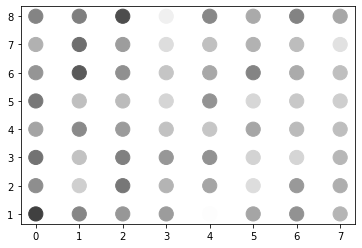

In [8]:
# 명도 보정
# 위의 값이 잘 나오는 것으로 보이기는 하지만, 명도의 범위가 0.695~0.971로 제한된다.
NC=63 # 문자의 개수

# 상대적 명도를 유지한 상태에서, 범위를 a에서 b로
# 기존 범위가 0.695~0.971이라고 일단 생각하자
a=0.25
b=0.99
cali_bright=[0]*64
for i in range(64):
  cali_bright[i]=a+(brightness[i]-0.695)/(0.971-0.695)*(b-a)

for i in range(8):
  for j in range(8):
    print("{:.3f}".format(cali_bright[i*8+j]),end=' ')
  print()
print()


sort_bright=[]
for i in range(NC):
  sort_bright.append([cali_bright[(7-i%8)*8+i//8],chr(i+64)])

sort_bright.sort()
for i in range(NC):
  print(sort_bright[i][1],end=' ')
  if i%8==7:
    print()
print()

sort_bright.append([1,' '])
NC+=1

x=[]
y=[]
c=[]
for i in range(8):
  for j in range(8):
    x.append(j)
    y.append(8-i)
    c.append((cali_bright[i*8+j],cali_bright[i*8+j],cali_bright[i*8+j]))
plt.scatter(x,y,s=200,c=c)

Text(0.5, 1.0, 'Calibrated')

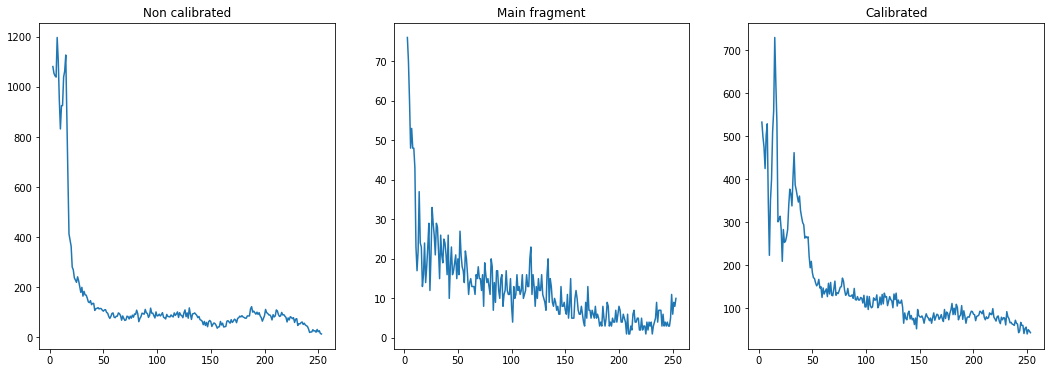

In [9]:
# Brightness distribution
# Uint type이건 정말 마음에 안드는구만

plt.figure(figsize=(18,6))
w=240
h=160
delta=1
len=256//delta+1
cut_idx=3 # 완전한 검은색, 흰색은 분석에 도움이 안되므로 자른다.

plt.subplot(1,3,1)
cnt=[0]*len
YELL=Image.open(PATH+"/YELL.jpg")
YELL=YELL.resize((w,h))
nYELL=np.array(YELL)
for i in range(h):
  for j in range(w):
    bright=((int)(nYELL[i][j][0])+(int)(nYELL[i][j][1])+(int)(nYELL[i][j][2]))/3
    cnt[(int)(bright/delta)]+=1;
plt.plot([delta*i for i in range(cut_idx,len-cut_idx)],cnt[cut_idx:len-cut_idx])
plt.title("Non calibrated")

plt.subplot(1,3,2)
cnt=[0]*len
YELL=Image.open(PATH+"/YELL_main.png")
YELL=YELL.resize((w,h))
nYELL=np.array(YELL)
for i in range(h):
  for j in range(w):
    bright=((int)(nYELL[i][j][0])+(int)(nYELL[i][j][1])+(int)(nYELL[i][j][2]))/3
    cnt[(int)(bright/delta)]+=1;
plt.plot([delta*i for i in range(cut_idx,len-cut_idx)],cnt[cut_idx:len-cut_idx])
plt.title("Main fragment")

plt.subplot(1,3,3)
cnt=[0]*len
YELL=Image.open(PATH+"/YELL_cali.jpg")
YELL=YELL.resize((w,h))
nYELL=np.array(YELL)
for i in range(h):
  for j in range(w):
    bright=((int)(nYELL[i][j][0])+(int)(nYELL[i][j][1])+(int)(nYELL[i][j][2]))/3
    cnt[(int)(bright/delta)]+=1;
plt.plot([delta*i for i in range(cut_idx,len-cut_idx)],cnt[cut_idx:len-cut_idx])
plt.title("Calibrated")

556   369


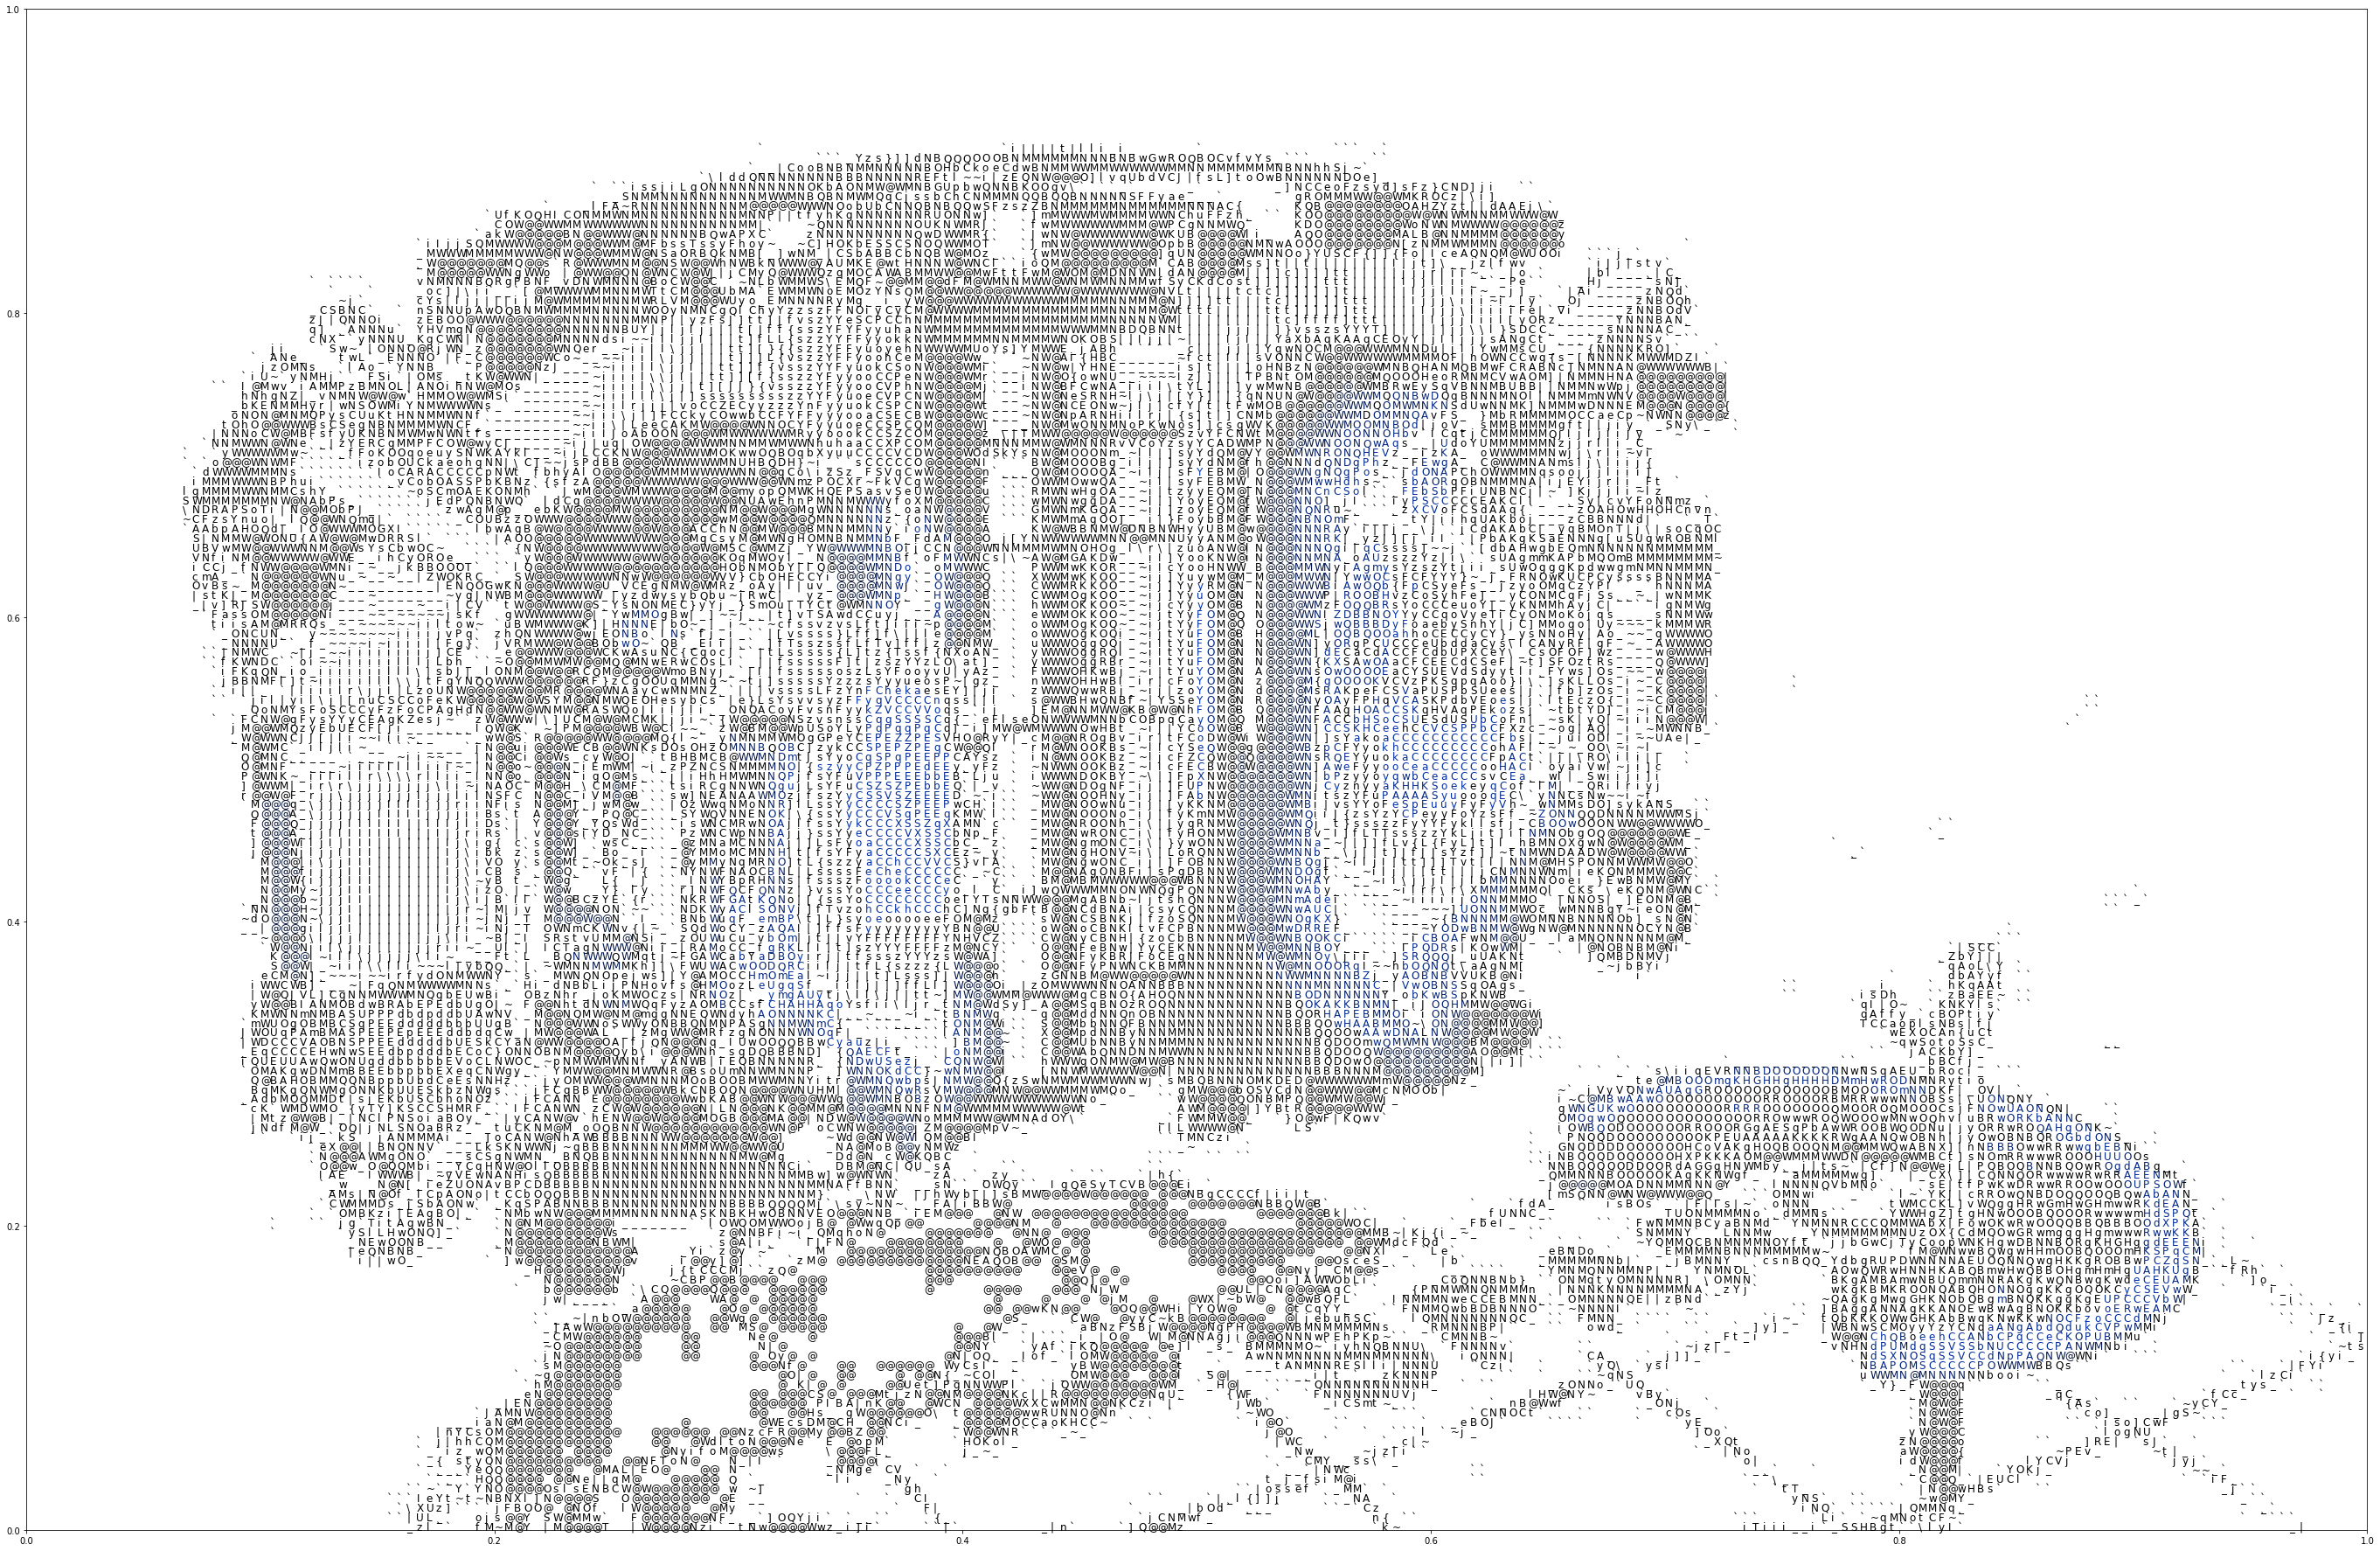

In [10]:
# SPARC blue

SPARC=Image.open(PATH+"/SPARC_ext.jpg")
SPARC=SPARC.crop((132,0,688,369))
w=SPARC.size[0]
h=SPARC.size[1]
print(w,' ',h)

# 색의 내적 개념
import math
tar_color=(0x02,0x47,0xfe)
R1=tar_color[0]*tar_color[0]+tar_color[1]*tar_color[1]+tar_color[2]*tar_color[2]
def inner_product(t_color):
  R2=t_color[0]*t_color[0]+t_color[1]*t_color[1]+t_color[2]*t_color[2]
  if R2==0: 
    return 0
  return (tar_color[0]*t_color[0]+tar_color[1]*t_color[1]+tar_color[2]*t_color[2])/math.sqrt(R1)/math.sqrt(R2)

w=240
h=160
#플롯팅할게 아니라면, 글씨 크기를 고려했을 때 비율이 달라짐
#w=840
#h=240
SPARC=SPARC.resize((w,h))
nSPARC=np.array(SPARC)

plt.figure(figsize=(48,32))
x=[]
y=[]
char=[]
c=[]
for i in range(h):
  for j in range(w):
    x.append(j)
    y.append(h-1-i)
    bright=(nSPARC[i][j][0]/256+nSPARC[i][j][1]/256+nSPARC[i][j][2]/256)/3
    if inner_product((int(nSPARC[i][j][0]),int(nSPARC[i][j][1]),int(nSPARC[i][j][2])))>0.85:
      c.append((bright*tar_color[0]/256,bright*tar_color[1]/256,bright*tar_color[2]/256))
      #c.append((tar_color[0]/256,tar_color[1]/256,tar_color[2]/256))
    else:
      c.append((0,0,0))
    c_temp=0
    for k in range(NC):
      if bright<=sort_bright[k][0]:
        c_temp=k
        break
    if bright>0.00:
      char.append(sort_bright[c_temp][1])
    else:
      char.append(' ')

for i in range(h*w):
  if char[i]!=' ':
    plt.text(x[i]/w,y[i]/h,char[i],color=c[i],fontsize=12)
plt.show()
